# Machine Learning with Scikit-learn
---

The core aim of the following notebook is to utilise scikit-learn as a means to showcase working examples of the supervised machine learning tasks of **classification** and **regression**. Within the opening section of this notebook, an explanation of what the domain of machine learning consists of will take place. Following from this an overview of the the scikit-learn python library will be provided.

---

## Machine Learning

Machine learning is regarded as a set of methods that contain the capacity to detect patterns in data and these methods then utilise such patterns to make future predictions (Garreta & Moncecchi, 2013; Hackeling, 2017; Jolly, 2018). Examples of machine learning in practice are that of predicting the weather, house prices, or detecting whether an email is spam or not. This notebook will place its emphasis on the machine learning category of supervised learning. Supervised learning is implemented when the data that we are analysing contains labels or a target variable that is numeric.

# An overview of the scikit-learn Python library

Scikit-learn is regarded as a simple and efficient tool that one can utilise for predictive data analysis (Scikit-learn, 2022). The software is built entirely using Python and utilises some of the most popular libraries that Python has to offer, namely NumPy and SciPy (Jolly, 2018). It is a free and open-source software with algorithms embedded that assist one with the execution of supervised and unsupervised machine learning problems (Jolly, 2018). Scikit-learn can execute the following tasks: classification, regression, dimensionality reduction, and clustering. It also has modules for pre-processing data, extracting features, optimizing hyperparameters, and evaluating models (Hackeling, 2017).

## Scikit-learn Common Procedures

**When conducting supervised learning tasks the following steps are generally implemented.**

- Read in the dataset
    - *Exploratory data analysis (EDA)*
    - *pre-process the data (Ensure that the dataset matches the **requirements** of scikit-learn)*
- Import the required libraries and modules
- Instantiate the algorithm
- Split the data into training and test sets
    - *Fit the model on the training set*
    - *Predict on the test set*
- Evaluate the performance of the model

# Supervised Learning: Regression

Regression is the prediction of the values of one more or **continous** response variables from one or more features (Hackeling, 2017). An example of this being that of predicting the length of a salmon as a function of its age and weight.

# Supervised Learning: Classification

Classification is the prediction of **discrete** values for one or more response variables from one or more features (Hackeling, 2017). An example of this being that of classifying houses into expensive or affordable categories based on their price, area, bedrooms etc.,

## Dataset description

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [2]:
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,5),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 15}
plt.rcParams.update(params)

## Exploratory Data Analysis

In [3]:
data = load_wine(as_frame=True)

In [4]:
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
data.frame

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
data.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:
data.data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
type(data.target)

pandas.core.series.Series

In [9]:
data.target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

In [10]:
data.target.count()

178

In [11]:
category = data.target_names
for i in category:
    print(i)

class_0
class_1
class_2


In [12]:
wine_category_count = data.frame['target'].value_counts()
wine_category_count

1    71
0    59
2    48
Name: target, dtype: int64

In [13]:
data.target.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [14]:
sns.color_palette("Set1")

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [15]:
# Return to default seaborn theme
# sns.set_theme()

sns.set_style("whitegrid")
sns.set_palette("Set1")

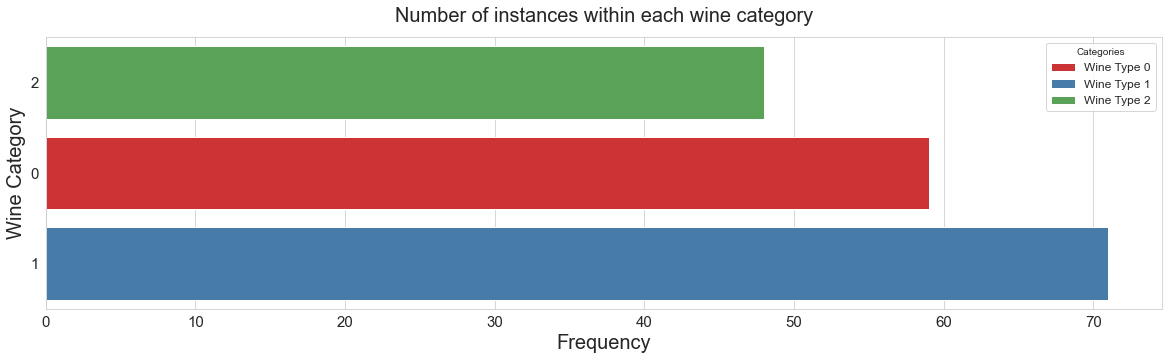

In [16]:
frequency_map = sns.countplot(y="target",
                              order = data.frame["target"].value_counts(ascending=True).index, 
                              hue="target", 
                              dodge=False, 
                              data=data.frame,
                             )

frequency_map.set(title="Number of instances within each wine category", 
                         xlabel = "Frequency", 
                         ylabel = "Wine Category")

plt.legend(["Wine Type 0","Wine Type 1", "Wine Type 2"],title = "Categories")
plt.show()



In [17]:
# sns.pairplot(data.frame, hue='target', palette="Set1")
# plt.show()

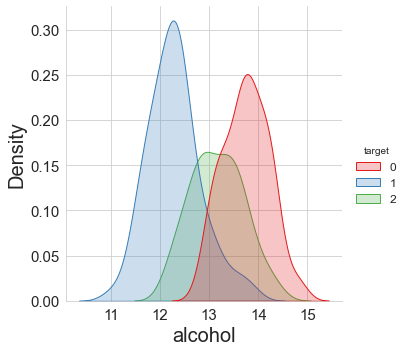

In [18]:
sns.displot(data=data.frame, x=data.frame['alcohol'], hue="target", kind='kde', fill=True, palette="Set1")

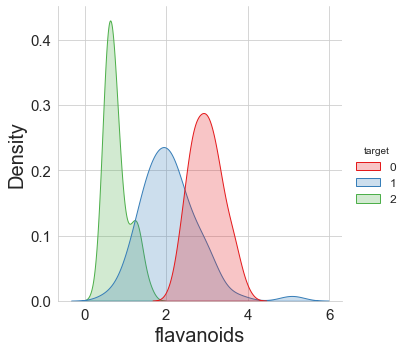

In [19]:
sns.displot(data=data.frame, x=data.frame['flavanoids'], hue="target", kind='kde', fill=True, palette="Set1")

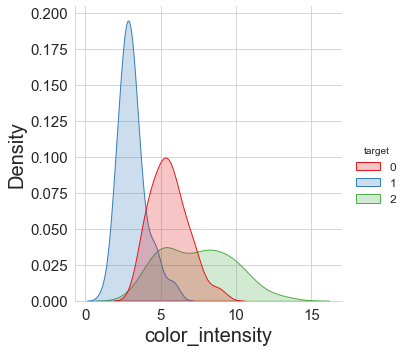

In [20]:
sns.displot(data=data.frame, x=data.frame['color_intensity'], hue="target", kind='kde', fill=True, palette="Set1")

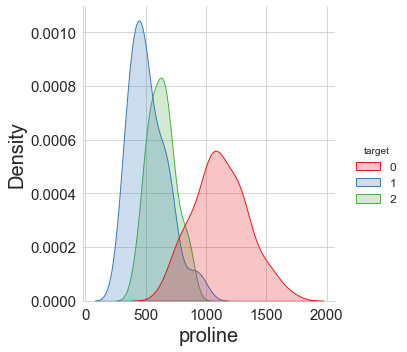

In [21]:
sns.displot(data=data.frame, x=data.frame['proline'], hue="target", kind='kde', fill=True, palette="Set1")

In [22]:
test = data.frame.groupby("target")
test

In [23]:
test.mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [24]:
info_table = data.frame[['alcohol', 'flavanoids', 'color_intensity',  'proline','target']]
info_table

sub_info = info_table.groupby('target')
sub_info.mean()

,alcohol,flavanoids,color_intensity,proline
target,,,,
0,13.744746,2.982373,5.528305,1115.711864
1,12.278732,2.080845,3.086620,519.507042
2,13.153750,0.781458,7.396250,629.895833


In [25]:
# X, y =  load_wine(as_frame=True, return_X_y=True)

Correlation 

In [26]:
correlation = data.data.corr(method = 'pearson')

<AxesSubplot:>

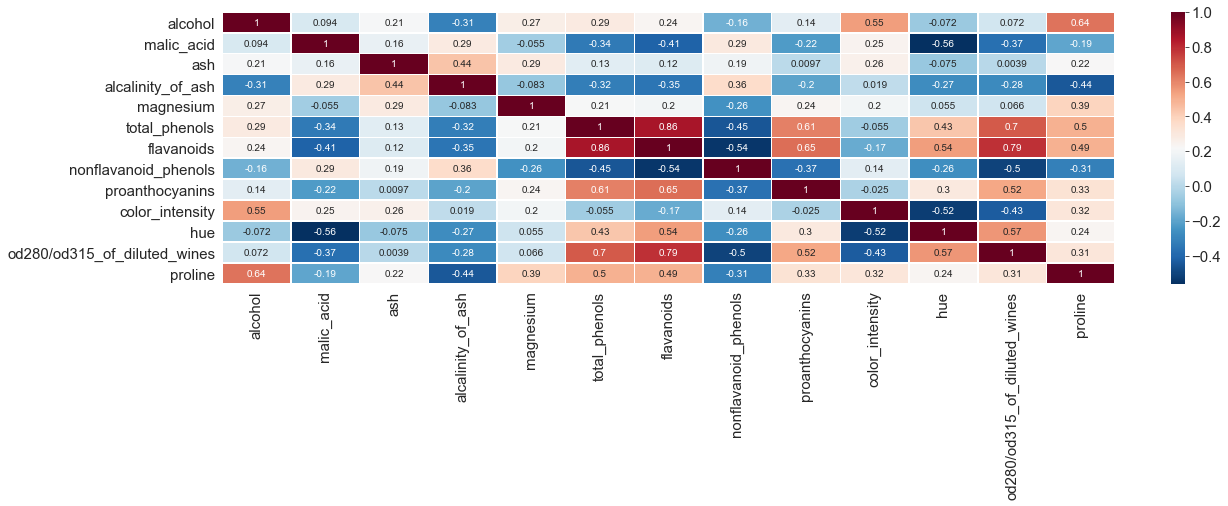

In [27]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap='RdBu_r', annot=True, linewidth=0.5)

# Predicting Categories K-Nearest Neighbors

## splitting the data into training and test sets

In [56]:
# Creating the features
features = data.frame.drop('target', axis =1).values
target = data.frame['target'].values

In [57]:
features

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify=target)

## implementation and evaluation of the model

In [59]:
# Import kneighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialising the KNN classifier with 3 neighbors
# The number of neighbors is chosen arbitrarily
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Extracting the accuracy score from the test sets
knn_classifier.score(X_test, y_test)

0.6851851851851852

### Fine-tuning the parameters of the K-NN algorithm

### Using GridSearchCV (algorithm) to find the optiomal number of neighbors

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
#Initializing a grid with possible number of neighbors from 1 to 24

grid = {'n_neighbors' : np.arange(1, 25)}

#Initializing a k-NN classifier 

knn_classifier = KNeighborsClassifier()

#Using cross validation to find optimal number of neighbors 

knn = GridSearchCV(knn_classifier, grid, cv = 10)

knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [62]:
#Extracting the optimal number of neighbors 

knn.best_params_

{'n_neighbors': 23}

In [63]:
#Extracting the accuracy score for optimal number of neighbors

knn.best_score_

0.7397435897435898

In [64]:
### Scaling for optimized performance

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [66]:
# Setting up the scaling pipeline
pipeline_order = [('scaler', StandardScaler()),
                  ('knn', KNeighborsClassifier(n_neighbors = 23))]

pipeline = Pipeline(pipeline_order)

#Fitting the classifier to the scaled dataset
knn_classifier_scaled = pipeline.fit(X_train, y_train)

#Extracting the score
knn_classifier_scaled.score(X_test, y_test)

0.9814814814814815

# References

---

Garreta, R. and Moncecchi, G. (2013) Learning Scikit-learn : Machine Learning in Python: Experience the Benefits of Machine Learning Techniques by Applying Them to Real-world Problems Using Python and the Open Source Scikit-learn Library. Birmingham, UK: Packt Publishing (Community Experience Distilled). Available at: https://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=e000xww&AN=673033&site=ehost-live&scope=site (Accessed: 26 July 2022).

Hackeling, G. (2017) Mastering Machine Learning with Scikit-learn - Second Edition. Birmingham, UK: Packt Publishing. Available at: https://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=e000xww&AN=1562686&site=ehost-live&scope=site (Accessed: 26 July 2022).

Kevin Jolly (2018) Machine Learning with Scikit-learn Quick Start Guide : Classification, Regression, and Clustering Techniques in Python. Birmingham, UK: Packt Publishing. Available at: https://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=e000xww&AN=1936459&site=ehost-live&scope=site (Accessed: 23 July 2022).

Scikit-learn (2022), Getting started, Available at: https://scikit-learn.org/stable/getting_started.html (Accessed: 26 July 2022).  
Scikit-learn (2022), User guide, Available at: https://scikit-learn.org/stable/user_guide.html (Accessed: 26 July 2022).  
Scikit-learn (2022), tutorial, Available at: https://scikit-learn.org/stable/tutorial/index.html (Accessed: 26 July 2022).